<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H07_baseline_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 07: Building a Baseline CNN for Medical Image Classification**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome to Notebook 07! We've covered a lot of ground, from the fundamentals of PyTorch to writing a complete training loop. Now, it's time to formalize this process and establish a **baseline model**.

A baseline model is a relatively simple but well-structured model that provides a "first-pass" result on a problem. It serves as a benchmark against which all of your future, more complex models will be compared. If a sophisticated new model can't outperform a solid baseline, it's probably not worth the extra complexity.

#### **What you will learn today:**
*   To design a solid, reusable **baseline CNN architecture** incorporating best practices like Batch Normalization and Dropout.
*   To establish a complete, end-to-end pipeline for training and evaluating this baseline on the PneumoniaMNIST dataset.
*   To perform a head-to-head comparison of your CNN's performance against a simpler machine learning model (Logistic Regression) to quantify the benefits of deep learning.
*   To interpret the results and identify the strengths and weaknesses of the baseline model.

***

## **2. Setup: Installing and Importing Libraries**

As always, we begin by setting up our environment.


In [ ]:
# Install required packages
!pip install torch torchvision medmnist scikit-learn seaborn


# --- PyTorch core ---
# TODO: import (main PyTorch library for tensors and computations)


# TODO: import (module to define neural network layers like Conv2d, Linear, etc.)


# TODO: import (module for optimization algorithms like SGD, Adam)


# TODO: import (functional API for loss functions and activations like relu, cross_entropy)


# TODO: import (data loading utilities, batching, subsetting)



# --- Torchvision transforms ---
# TODO: import (tools to apply preprocessing to images: ToTensor, Normalize, f1_score, confusion_matrix)


# --- MedMNIST dataset ---
# TODO: import (PneumoniaMNIST medical dataset)



# --- General-purpose libraries ---
# TODO: import (for numerical computations)


# TODO: import (for plotting and visualizing results)


# --- scikit-learn metrics ---
# TODO: import (for computing model evaluation metrics like accuracy, precision, recall, etc.)


# --- scikit-learn models ---
# TODO: import (for applying a simple logistic regression classifier)


# --- Seaborn ---
# TODO: import (for enhanced data visualization: used here for confusion matrices)


# Set random seed for reproducibility
# TODO: set seed for CPU
torch.

# TODO: if CUDA (GPU) is available, set seed for all GPUs

# -----------------------------------------------------
# Define the device: use GPU if available, otherwise CPU
# -----------------------------------------------------

# TODO: check for GPU availability and set device accordingly
device = torch.device("______" if torch.cuda.is_available() else "_____")
print(f"Using device: {}")


***
## **3. Preparing the Dataset**

We will use the PneumoniaMNIST dataset and the same data loading pipeline as before.

In [ ]:
# Define data transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the full datasets (train, val, test)
train_dataset_full = PneumoniaMNIST(split='train', transform=data_transforms, download=True)
val_dataset_full =
test_dataset_full =

# Create DataLoaders for each dataset
train_loader = DataLoader(dataset=train_dataset_full, batch_size=64, shuffle=True) #WE need the shuffle = True just in training
val_loader =
test_loader =

# TODO: print dataset sizes
print(f"Training on {len(train_dataset_full)} images.")
print(f"Validating on {...} images.")
print(f"Testing on {...} images.")

100%|██████████| 4.17M/4.17M [00:06<00:00, 644kB/s]


Training on 4708 images.
Validating on 524 images.
Testing on 624 images.


***

## **4. Designing the Baseline CNN Architecture**

A good baseline CNN should be simple enough to train quickly but complex enough to learn meaningful features. Our architecture will include:
*   **Two Convolutional Blocks:** Each containing a `Conv2d` layer, `BatchNorm2d`, a `ReLU` activation, and `MaxPool2d`.
*   **Batch Normalization (`BatchNorm2d`):** Stabilizes and accelerates training by normalizing the activations of the previous layer.
*   **A Classifier Head:** Composed of `Linear` layers.
*   **Dropout:** A regularization technique that randomly sets a fraction of input units to 0 during training to prevent overfitting.


In [ ]:
# PneumoniaMNIST data set, contains grayscale images of shape (1,28,28) [Channels,Height,Width]
class BaselineCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(BaselineCNN, self).__init__()

        # Convolutional Block 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # Convolutional Block 2 (Conv2d -> BatchNorm2d)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = ...

        # Shared Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected Classifier
        self.fc1 = nn.Linear(in_features=64 * 7 * ...why i, out_features=128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(in_features=..., out_features=...) # 2 classes

    def forward(self, x):
        # Pass through Block 1
        x = self.conv1(x) #shape: [B, 32, 28, 28]
        x = self.bn1(x)
        x = F.            # ReLU
        x = self.pool(x) #MaxPool(2) → [B, 32, 14, 14]

        # Pass through Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten for the classifier
        x = x.view(-1,...) #[B, 64, 7, 7] → [B, 3136]

        # Pass through the classifier
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Instantiate the model and move it to the GPU
model =
print(model)

# TODO: Define Loss (Cross entropy from nn.) and Adam optimizer with lr=0.001 from optim.
criterion =
optimizer =

BaselineCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


***

## **5. Reusable Training and Validation Functions**

We'll use the same robust training and validation functions from the previous notebook.

In [ ]:
def train_one_epoch(model, data_loader, criterion, optimizer, device):
    # TODO: set the model in the training mode
    model. ...
    total_loss, total_correct = 0.0, 0

    for images, labels in data_loader:
        # TOOD: move the data to the correct device
        images, labels = images.to(), labels.to().squeeze().long()
        # TODO: Clear gradients before backpropagation
        optimizer.
        outputs = model(images) #Forward Pass
        loss = criterion(outputs, labels)
        loss.backward()
        # TODO: Update model parameters
        optimizer.

        total_loss += loss.item() * images.size(0)
        total_correct += (torch.argmax(outputs, dim=1) == labels).sum().item()

    epoch_loss = total_loss / len(data_loader. ...)
    epoch_acc = total_correct / len(data_loader. ...)
    return epoch_loss, epoch_acc

def evaluate(model, data_loader, criterion, device):
    #Set model to evaluation mode
    model.
    total_loss, total_correct = 0.0, 0
    all_labels, all_predictions = [], []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device).squeeze().long()
            # TODO: Forward Pass
            outputs =
            loss = criterion(outputs, labels)

            total_loss += loss.item() * images.size(0)
            predictions = torch.argmax(outputs, dim=1)
            # TODO: Count correct predictions
            total_correct += (... == labels).sum().item()
            # TODO: Store predictions and labels for later analysis
            all_labels.extend(... .cpu().numpy())
            all_predictions.extend(... .cpu().numpy())

    epoch_loss = total_loss / len(data_loader.dataset)
    epoch_acc = total_correct / len(data_loader.dataset)
    return epoch_loss, epoch_acc, all_labels, all_predictions

***

## **6. Training the Baseline Model**

Let's train our CNN and watch its performance evolve over 10 epochs.

In [ ]:
num_epochs = 10
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

print("Starting training of the baseline CNN...")
for epoch in range(...):
    #TODO: train the model for one epoch
    train_loss, train_acc = ...(model, train_loader, criterion, optimizer, device)
    # TODO: evaluate the model on the validation set
    val_loss, val_acc, _, _ = evaluate(model, ..., criterion, device)

    history['train_loss'].append(train_loss)
    history['train_acc'].append(...)
    history['val_loss'].append(...)
    history['val_acc'].append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("Training finished!")

Starting training of the baseline CNN...
Epoch [1/10] - Train Loss: 0.2906, Train Acc: 0.8938 | Val Loss: 0.1354, Val Acc: 0.9542
Epoch [2/10] - Train Loss: 0.1330, Train Acc: 0.9484 | Val Loss: 0.1009, Val Acc: 0.9580
Epoch [3/10] - Train Loss: 0.1065, Train Acc: 0.9584 | Val Loss: 0.0864, Val Acc: 0.9695
Epoch [4/10] - Train Loss: 0.0924, Train Acc: 0.9647 | Val Loss: 0.0914, Val Acc: 0.9637
Epoch [5/10] - Train Loss: 0.0909, Train Acc: 0.9662 | Val Loss: 0.0888, Val Acc: 0.9695
Epoch [6/10] - Train Loss: 0.0781, Train Acc: 0.9734 | Val Loss: 0.0929, Val Acc: 0.9656
Epoch [7/10] - Train Loss: 0.0706, Train Acc: 0.9737 | Val Loss: 0.0951, Val Acc: 0.9618
Epoch [8/10] - Train Loss: 0.0673, Train Acc: 0.9760 | Val Loss: 0.0832, Val Acc: 0.9714
Epoch [9/10] - Train Loss: 0.0656, Train Acc: 0.9783 | Val Loss: 0.0660, Val Acc: 0.9771
Epoch [10/10] - Train Loss: 0.0618, Train Acc: 0.9766 | Val Loss: 0.1097, Val Acc: 0.9618
Training finished!


***

## **7. Evaluating the Baseline CNN**

First, let's visualize the training process. This helps us check for issues like overfitting.


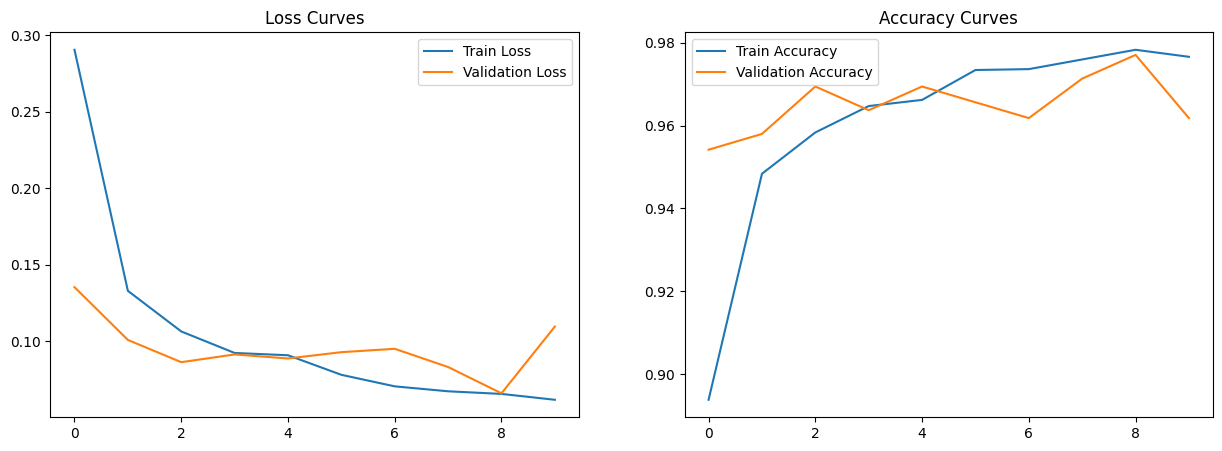

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history['train_loss'], label='Train Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title("Loss Curves")
ax1.legend()
ax2.plot(history['train_acc'], label='Train Accuracy')
ax2.plot(history['val_acc'], label='Validation Accuracy')
ax2.set_title("Accuracy Curves")
ax2.legend()
plt.show()

Now, let's perform a detailed evaluation on the validation set, including Precision, Recall, and a Confusion Matrix.



--- CNN Baseline Performance [Validation set] ---
Accuracy: 0.9618
Precision: 0.9920
Recall (Sensitivity): 0.9563
F1-Score: 0.9738


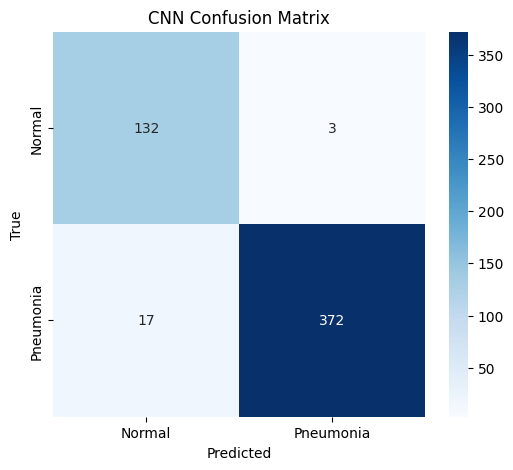


--- CNN Baseline Performance [Test set] ---
Accuracy: 0.8814
Precision: 0.8527
Recall (Sensitivity): 0.9795
F1-Score: 0.9117


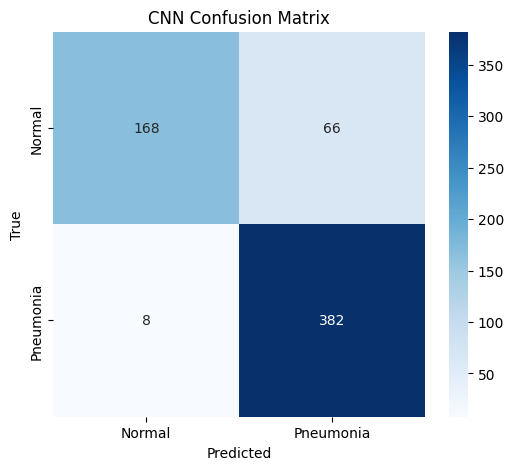

In [ ]:
# Get final predictions on the validation set
_, _, true_labels, pred_labels = evaluate(model, val_loader, criterion, device)

# Calculate metrics
precision = precision_score(true_labels, pred_labels, zero_division=0)
recall = recall_score(true_labels, pred_labels, zero_division=0)
f1 = f1_score(true_labels, pred_labels, zero_division=0)
accuracy = accuracy_score(true_labels, pred_labels)

print("\n--- CNN Baseline Performance [Validation set] ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(...,... )
plt.figure(figsize=(6, 5))
sns.heatmap(..., annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# TODO: Repeat for the test set


***

## **8. Comparison with a Non-Deep Learning Baseline**

How much better is our CNN than a simpler, traditional machine learning model? Let's train a **Logistic Regression** model on the same data and compare the results.

For Logistic Regression, the input images must be "flattened" into 1D vectors.


Training Logistic Regression baseline...

--- Logistic Regression Baseline Performance [Validation Set] ---
Accuracy: 0.9256
Precision: 0.9487
Recall: 0.9512


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


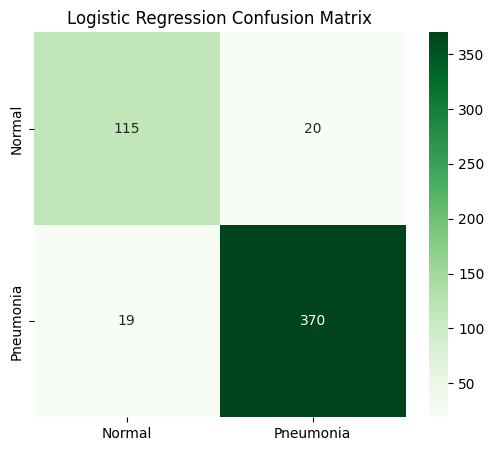


--- Logistic Regression Baseline Performance [Test Set] ---
Accuracy: 0.8189
Precision: 0.7856
Recall: 0.9769


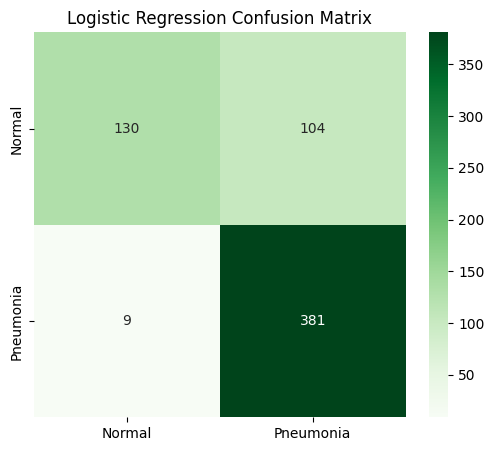

In [ ]:
# Prepare flattened data for scikit-learn
X_train_flat = train_dataset_full.imgs.reshape(len(train_dataset_full), -1)
y_train_flat = train_dataset_full.labels.flatten()

#TODO: flatten the validation and test data sets
X_val_flat =
y_val_flat =

X_test_flat =
y_test_flat =

# Train the Logistic Regression model
print("\nTraining Logistic Regression baseline...")
logreg_model = ...(max_iter=1000, random_state=42)
logreg_model.fit(X_train_flat, y_train_flat)

# Evaluate on the validation set
logreg_preds = logreg_model.predict(X_val_flat)
logreg_acc = accuracy_score(...,... )
logreg_prec = precision_score(y_val_flat, logreg_preds, zero_division=0)
logreg_rec = recall_score(y_val_flat, logreg_preds, zero_division=0)

print("\n--- Logistic Regression Baseline Performance [Validation Set] ---")
print(f"Accuracy: {logreg_acc:.4f}")
print(f"Precision: {logreg_prec:.4f}")
print(f"Recall: {logreg_rec:.4f}")

# Plot confusion matrix
cm_logreg = confusion_matrix(y_val_flat, logreg_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# TODO: Evaluate on the test set


# Plot confusion matrix
cm_logreg = confusion_matrix(y_test_flat, logreg_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### **Reflection**
Compare the accuracy and confusion matrices of the two models. The CNN is likely significantly better. Why? Because convolutions are designed to learn spatial patterns (like textures and shapes), which are crucial for interpreting images. Logistic Regression, on the other hand, treats every pixel independently, losing all spatial information.

***

## **9. Summary and Next Steps**


This baseline model is now your benchmark. In the upcoming notebooks, we will explore techniques like **Data Augmentation**, **Advanced Architectures**, and **Transfer Learning** to see if we can beat it
